In [ ]:
!pip install contextily folium mapclassify

In [67]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import pandas as pd
import contextily as ctx

In [68]:
!git clone https://github.com/yezongyang/china-geojson.git

Cloning into 'china-geojson'...
remote: Enumerating objects: 387, done.
remote: Total 387 (delta 0), reused 0 (delta 0), pack-reused 387
Receiving objects: 100% (387/387), 2.34 MiB | 14.52 MiB/s, done.


In [140]:
gdf = gpd.read_file("china-geojson/china.json")
df = pd.read_csv("Provinces_of_China.csv")

gdf = pd.merge(gdf, df[["name", "Population"]], on="name", how="left")
gdf

,id,size,name,childNum,geometry,Population
0,65,550,新疆维吾尔自治区,18,"POLYGON ((96.41600 42.75880, 96.41600 42.71480...",25852345
1,54,550,西藏自治区,7,"POLYGON ((79.01370 34.32130, 79.10160 34.45310...",3648100
2,15,450,内蒙古自治区,12,"POLYGON ((97.20700 42.80270, 99.49220 42.58300...",24049155
3,63,800,青海省,8,"POLYGON ((89.73630 36.07910, 89.91210 36.07910...",5923957
4,51,900,四川省,21,"POLYGON ((101.77730 33.53030, 101.86520 33.574...",83674866
5,23,700,黑龙江省,13,"POLYGON ((121.46480 53.34960, 123.66210 53.569...",31850088
6,62,690,甘肃省,14,"POLYGON ((96.41600 42.71480, 97.20700 42.80270...",25019831
7,53,1200,云南省,16,"POLYGON ((98.17380 28.12500, 98.26170 28.38870...",47209277
8,45,1450,广西壮族自治区,14,"POLYGON ((104.50200 24.74120, 104.67770 24.609...",50126804
9,43,1700,湖南省,14,"POLYGON ((109.24800 28.47660, 109.24800 29.135...",66444864


In [141]:
gdf['centroid'] = gdf['geometry'].centroid
gdf['latitude'] = gdf['centroid'].y
gdf['longitude'] = gdf['centroid'].x
gdf

<ipython-input-141-bc701ff99c25>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf['geometry'].centroid


,id,size,name,childNum,geometry,Population,centroid,latitude,longitude
0,65,550,新疆维吾尔自治区,18,"POLYGON ((96.41600 42.75880, 96.41600 42.71480...",25852345,POINT (85.19264 41.12289),41.122889,85.192642
1,54,550,西藏自治区,7,"POLYGON ((79.01370 34.32130, 79.10160 34.45310...",3648100,POINT (88.43673 31.48823),31.488233,88.436733
2,15,450,内蒙古自治区,12,"POLYGON ((97.20700 42.80270, 99.49220 42.58300...",24049155,POINT (113.92912 44.08810),44.088099,113.929122
3,63,800,青海省,8,"POLYGON ((89.73630 36.07910, 89.91210 36.07910...",5923957,POINT (96.03436 35.65830),35.658295,96.034364
4,51,900,四川省,21,"POLYGON ((101.77730 33.53030, 101.86520 33.574...",83674866,POINT (102.70151 30.62681),30.626806,102.701507
5,23,700,黑龙江省,13,"POLYGON ((121.46480 53.34960, 123.66210 53.569...",31850088,POINT (127.77378 47.87188),47.871884,127.773781
6,62,690,甘肃省,14,"POLYGON ((96.41600 42.71480, 97.20700 42.80270...",25019831,POINT (100.60275 37.88481),37.884813,100.602749
7,53,1200,云南省,16,"POLYGON ((98.17380 28.12500, 98.26170 28.38870...",47209277,POINT (101.49215 24.96036),24.960364,101.492148
8,45,1450,广西壮族自治区,14,"POLYGON ((104.50200 24.74120, 104.67770 24.609...",50126804,POINT (108.79660 23.80252),23.802516,108.796603
9,43,1700,湖南省,14,"POLYGON ((109.24800 28.47660, 109.24800 29.135...",66444864,POINT (111.70496 27.61472),27.614723,111.704959


<ipython-input-142-536aaa607859>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.dissolve().centroid


<Axes: >

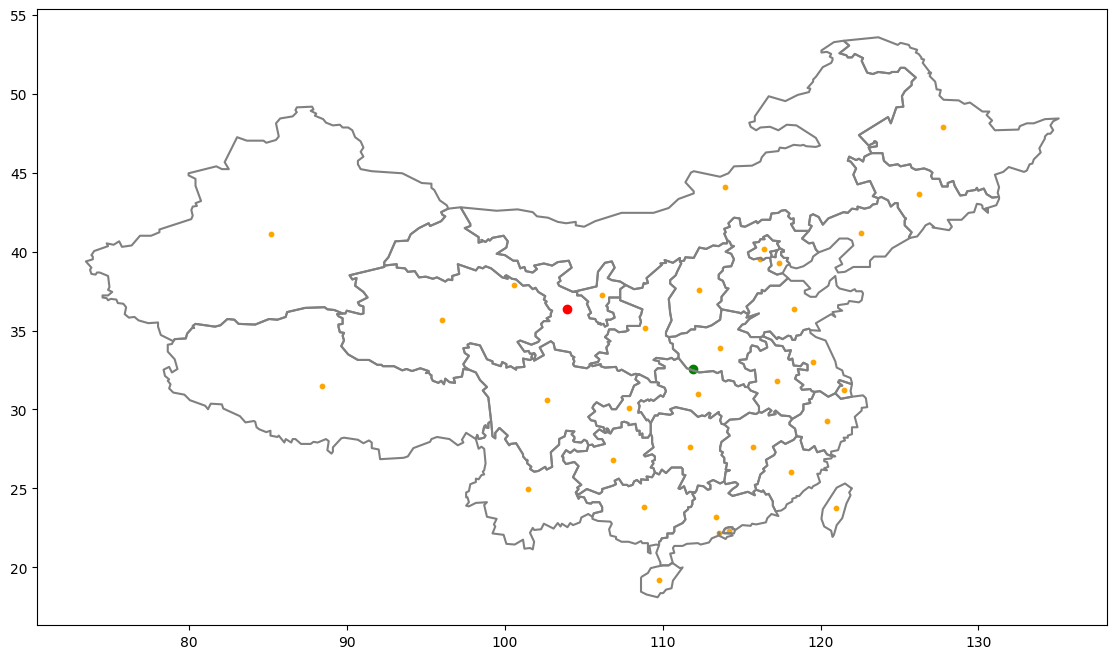

In [142]:
centroid = gdf.dissolve().centroid
mean_center = Point(gdf["longitude"].mean(), gdf["latitude"].mean())
mean_gdf = gpd.GeoDataFrame(geometry=[mean_center])

fig, ax = plt.subplots(figsize=(15, 8))
ax = gdf.boundary.plot(ax=ax, color="grey")
ax = gdf["centroid"].plot(ax=ax, color="orange", markersize=10)
ax = centroid.plot(ax=ax, color="red")
mean_gdf.plot(ax=ax, color="green")



In [154]:
centroid = gdf.dissolve().centroid
centroid_gdf = gpd.GeoDataFrame({"name": "Centroid", "geometry":[centroid[0]]})

mean_center = Point(gdf["longitude"].mean(), gdf["latitude"].mean())
mean_center_gdf = gpd.GeoDataFrame({"name": "Mean center", "geometry":[mean_center]})

mean_weighted_center = Point((gdf["Population"]*gdf["longitude"]).sum()/gdf["Population"].sum(), (gdf["Population"]*gdf["latitude"]).sum()/gdf["Population"].sum())
mean_weighted_center_gdf = gpd.GeoDataFrame({"name": "Mean weighted center", "geometry":[mean_weighted_center]})

m = gdf.explore(color="grey", tooltip=False, width="80%", height="80%")
m = gdf["centroid"].explore(m=m, color="orange")
m = centroid_gdf.explore(m=m, color="red", marker_kwds=dict(radius=5, fill=True))
m = mean_center_gdf.explore(m=m, color="green", marker_kwds=dict(radius=5, fill=True))
m = mean_weighted_center_gdf.explore(m=m, color="blue", marker_kwds=dict(radius=5, fill=True))
m

<ipython-input-154-ac825b48c3e2>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf.dissolve().centroid


## Sin Taiwan ni Hainan

In [ ]:
filter = (gdf["name"] != "台湾省") & (gdf["name"] != "海南省")
centroid = gdf[filter].dissolve().centroid
mean_center = Point(gdf[filter]["longitude"].mean(), gdf[filter]["latitude"].mean())
mean_gdf = gpd.GeoDataFrame({"name": "hola", "geometry":[mean_center]})

fig, ax = plt.subplots(figsize=(15, 8))
ax = gdf[filter].boundary.plot(ax=ax)
ax = gdf[filter]["centroid"].plot(ax=ax, color="orange", markersize=10)
ax = centroid.plot(ax=ax, color="red")
mean_gdf.plot(ax=ax, color="green")


plt.show()

# Scrap

In [108]:
from bs4 import BeautifulSoup
import requests
import time

In [71]:
response = requests.get("https://populationstat.com/china/")

In [72]:
soup = BeautifulSoup(response.content, 'html.parser')

In [73]:
tab = soup.find("table", id="ph4")

In [165]:
header = [ i.text for i in tab.find("thead").find_all("th")]
header = header[:2] + ["Latitude", "Longitude", "geometry"] + header[2:]

In [156]:
ans = []
for row in tab.find("tbody").find_all("tr"):
    temp = []
    for i,j in enumerate(row.find_all("td")):
        if i == 0 or i == 2 or i == 3:
            try:
                temp.append(int(j.text.replace(",", "")))
            except:
                temp.append(None)
        else:
            temp.append(j.text)
            try:
                nominatim_url = f"https://nominatim.openstreetmap.org/search.php?city={j.text}&country=China&format=jsonv2"
                time.sleep(0.1)
                r = requests.get(nominatim_url)
                lat, lon = float(r.json()[0]["lat"]), float(r.json()[0]["lon"])
                centre_point = Point(lon, lat)
            except:
                print(f"Error with {j.text}")
                lat, lon, centre_point = None, None, None
            temp.append(lat)
            temp.append(lon)
            temp.append(centre_point)

    ans.append(temp)


Error with Qiqihaer(1)
Error with Kuerle(1)
Error with Ordoss(1)


In [ ]:
ans[74][2], ans[74][3], ans[74][4] = 47.3392424, 123.9495373, Point(123.9495373, 47.3392424)
ans[173][2], ans[173][3], ans[173][4] = 41.7238743, 86.173541, Point(86.173541, 41.7238743)
ans[204][2], ans[204][3], ans[204][4] = 39.6081457, 109.7763659, Point(109.7763659, 39.6081457)
ans

In [167]:
chinese_cities = gpd.GeoDataFrame(ans, columns=header)
chinese_cities

,Rank,City,Latitude,Longitude,geometry,"Population, Urban Area","Population, City"
0,1,Shanghai,31.232344,121.469102,POINT (121.46910 31.23234),28240233,22315474.0
1,2,Beijing,39.905714,116.391297,POINT (116.39130 39.90571),21165634,18960744.0
2,3,Chongqing,29.565673,106.547919,POINT (106.54792 29.56567),16685754,7457599.0
3,4,Tianjin,39.117549,117.191301,POINT (117.19130 39.11755),13928317,11090314.0
4,5,Guangzhou,23.130196,113.259294,POINT (113.25929 23.13020),13838324,13965000.0
...,...,...,...,...,...,...,...
413,414,Hailin,44.573346,129.381575,POINT (129.38157 44.57335),332697,85578.0
414,415,Rushan,36.913625,121.525514,POINT (121.52551 36.91362),332313,NaN
415,416,Anning,24.837749,102.402683,POINT (102.40268 24.83775),330929,106795.0
416,417,Rugao,32.373466,120.569774,POINT (120.56977 32.37347),328313,257400.0


In [175]:
chinese_cities.explore(m=m)

In [173]:
chinese_cities.to_file("cities.json", driver='GeoJSON')